# CNN TP1

- MNIST dataset
- Comparer DNN (MLP de sklearn) et CNN ("Sequential" de Keras).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")

In [2]:
X, Y = mnist.data / 255.0, mnist.target

In [3]:
print("X shape", X.shape)
print("Y", Y.shape)
print("image size:", int(np.sqrt(784)))

X shape (70000, 784)
Y (70000,)
image size: 28


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    shuffle=True,
    test_size=0.3
)

print("train shape", X_train.shape)
print("train", X_train.shape[0])
print("test", X_test.shape[0])

train shape (49000, 784)
train 49000
test 21000


In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [6]:
clfs = [
    ("GaussianNB", GaussianNB()),
    ("MultinomialNB", MultinomialNB()),
    # ("SVM rbf", SVC(kernel="rbf")),
    ("SVM linear", LinearSVC()),
    # ("kNN 3", KNeighborsClassifier(n_neighbors=3)),
    ("MLP SGD 20", MLPClassifier(hidden_layer_sizes=(20,), activation="relu",solver="sgd")),
    # ("MLP Adam 20", MLPClassifier(hidden_layer_sizes=(20,), activation="relu",solver="adam")),
]

for name, clf in clfs:
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    score_train = clf.score(X_train, Y_train)
    print(f"{name:20} score = {score}, {score_train}")

GaussianNB           score = 0.5477142857142857, 0.5486530612244898
GaussianNB           score = 0.8221904761904761, 0.8265714285714286
SVM linear           score = 0.9098571428571428, 0.9299795918367347


/home/jbjuin/.local/share/virtualenvs/cours-pWOZq47j/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP SGD 20           score = 0.9498095238095238, 0.9596326530612245


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

(784,)


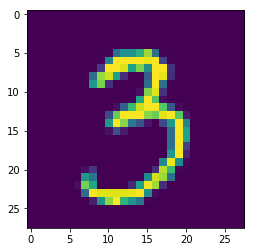

In [7]:
print(X[0, :].shape)
plt.imshow(X[20000, :].reshape(28,28))
plt.show()


In [18]:
img_rows, img_cols = 28, 28
batch_size = 1
num_channel = 1
data_format = "channels_last"
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    shuffle=True,
    test_size=0.3
)

print("train shape", X_train.shape)
print("train", X_train.shape[0])
print("test", X_test.shape[0])

# on reforme les données en array 2D et non plus en 1D
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channel)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channel)
print(X_test.shape, X_train.shape)

# on reshape les sortie qui son les chiffres : 0 à 9
# en vercteur binaire de longueur 10
# 0 -> 1 0 0 0 0 0 0 0 0 0
# 1 -> 0 1 0 0 0 0 0 0 0 0
# etc ...
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

train shape (49000, 784)
train 49000
test 21000
(21000, 28, 28, 1) (49000, 28, 28, 1)


In [ ]:
plt.figure

In [40]:
input_layer = Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    input_shape=input_shape, 
    data_format=data_format,
    padding="same",
    activation="relu")
# KERAS CNN: 
model = Sequential()
#28x28
model.add(input_layer)
#28x28
model.add(MaxPooling2D(pool_size=(2, 2)))
#14x14
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape, activation="relu", padding="same"))
#14x14
model.add(MaxPooling2D(pool_size=(2, 2)))
#7x7
model.add(Flatten())
model.add(Dense(49, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print("done")

done


In [41]:
from keras import optimizers

print("start compile")
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['accuracy'])
print("done")

start compile
done


In [42]:
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 49000 samples, validate on 21000 samples
Epoch 1/1
49000/49000 [==============================] - 458s 9ms/step - loss: 0.0093 - acc: 0.9341 - val_loss: 0.0034 - val_acc: 0.9772


## Visu

Pour visualiser les filtres
pip3 install keras-vis

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.003417445059334222, 0.9771904761904762]


In [44]:
Y_predicted = model.predict(X_test)
print(Y_predicted[0], Y_test[0])
print("score :", np.mean(Y_predicted.argmax(axis=1) == Y_test.argmax(axis=1)))

[8.7489883e-05 5.1998663e-06 9.7397649e-05 2.0981909e-04 6.2625266e-05
 2.9212635e-03 8.0579739e-06 8.4288949e-05 9.9259663e-01 3.9273212e-03] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
score : 0.9771904761904762


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# Generate dummy data
# import numpy as np
# data = np.random.random((1000, 100))
# labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
# model.fit(data, labels, epochs=10, batch_size=32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))